In [1]:
#Problem 3 Breast Cancer Wisconsin (Diagnostic)-continuous
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.impute import SimpleImputer

from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Set up dataframe
bc_df_two = pd.read_csv("wdbc.data", names=[
        'ID','Diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'])
bc_df_two = bc_df_two.drop(columns=['ID'])

#Store Diagnosis label & drop it for pca
diagnosis = bc_df_two['Diagnosis']
bc_df_two = bc_df_two.drop(columns=['Diagnosis'])
bc_df_two.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
#Create decision tree without conducting pca; Set up data as samples and features
X = bc_df_two
y = diagnosis

#Using the train_test_split function to make a split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

#For self usage
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


[Text(167.4, 181.2, 'X[23] <= 884.55\ngini = 0.46\nsamples = 455\nvalue = [292, 163]'),
 Text(83.7, 108.72, 'X[27] <= 0.156\ngini = 0.133\nsamples = 306\nvalue = [284, 22]'),
 Text(41.85, 36.23999999999998, 'gini = 0.066\nsamples = 291\nvalue = [281, 10]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.32\nsamples = 15\nvalue = [3, 12]'),
 Text(251.10000000000002, 108.72, 'X[6] <= 0.072\ngini = 0.102\nsamples = 149\nvalue = [8, 141]'),
 Text(209.25, 36.23999999999998, 'gini = 0.494\nsamples = 18\nvalue = [8, 10]'),
 Text(292.95, 36.23999999999998, 'gini = 0.0\nsamples = 131\nvalue = [0, 131]')]

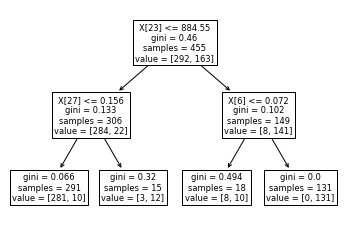

In [6]:
#Defining and fitting a decision tree instance; Same requirements as Problem 2
classifier = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=5)
classifier = classifier.fit(X_train, y_train)

#Setting up expectations and prediction
expected = y_test
predicted = classifier.predict(X_test)

#Show a visual representation of the tree
tree.plot_tree(classifier)

In [7]:
#Look at main classification metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           B       0.91      0.98      0.95        65
           M       0.98      0.88      0.92        49

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



In [8]:
#Create confusion matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(expected, predicted).ravel()
(tn, fp, fn, tp)

(64, 1, 6, 43)

In [9]:
#Creating pca with component 1
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
pca_bc_ds = pca.fit_transform(bc_df_two)
pca_bf = pd.DataFrame(data=pca_bc_ds, columns=['PCA1'])
pca_bf.head()

,PCA1
0,1160.142574
1,1269.122443
2,995.793889
3,-407.180803
4,930.341180


In [10]:
#Set-up data as samples and features
X = pca_bf
y = diagnosis

#Using the train_test_split function to make a split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

#For self usage
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 1) (455,)
(114, 1) (114,)


[Text(167.4, 181.2, 'X[0] <= 41.653\ngini = 0.474\nsamples = 455\nvalue = [279, 176]'),
 Text(83.7, 108.72, 'X[0] <= -191.457\ngini = 0.215\nsamples = 310\nvalue = [272, 38]'),
 Text(41.85, 36.23999999999998, 'gini = 0.074\nsamples = 235\nvalue = [226, 9]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.474\nsamples = 75\nvalue = [46, 29]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 260.355\ngini = 0.092\nsamples = 145\nvalue = [7, 138]'),
 Text(209.25, 36.23999999999998, 'gini = 0.32\nsamples = 30\nvalue = [6, 24]'),
 Text(292.95, 36.23999999999998, 'gini = 0.017\nsamples = 115\nvalue = [1, 114]')]

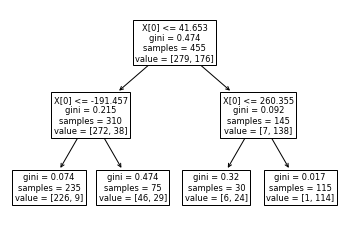

In [11]:
#Defining and fitting a decision tree instance
classifier = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=5)
classifier = classifier.fit(X_train, y_train)

#Setting up expectations and prediction
expected = y_test
predicted = classifier.predict(X_test)

#Show a visual representation of the tree
tree.plot_tree(classifier)

In [12]:
#Look at main classification metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           B       0.95      0.99      0.97        78
           M       0.97      0.89      0.93        36

    accuracy                           0.96       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [13]:
#Create confusion matrix
tn, fp, fn, tp = confusion_matrix(expected, predicted).ravel()
(tn, fp, fn, tp)

(77, 1, 4, 32)

In [14]:
#Creating pca with component 2
pca_two = decomposition.PCA(n_components=2)
pca2_bc_ds = pca_two.fit_transform(bc_df_two)
pca2_bf = pd.DataFrame(data=pca2_bc_ds, columns=['PCA1', 'PCA2'])
pca2_bf.head()

,PCA1,PCA2
0,1160.142574,-293.917544
1,1269.122443,15.630182
2,995.793889,39.156743
3,-407.180803,-67.380320
4,930.341180,189.340742


In [15]:
#Set-up data as samples and features
X = pca2_bf
y = diagnosis

#Using the train_test_split function to make a split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

#For self usage
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 2) (455,)
(114, 2) (114,)


[Text(167.4, 181.2, 'X[0] <= 41.653\ngini = 0.472\nsamples = 455\nvalue = [281, 174]'),
 Text(83.7, 108.72, 'X[0] <= -191.457\ngini = 0.209\nsamples = 312\nvalue = [275, 37]'),
 Text(41.85, 36.23999999999998, 'gini = 0.072\nsamples = 239\nvalue = [230, 9]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.473\nsamples = 73\nvalue = [45, 28]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 260.355\ngini = 0.08\nsamples = 143\nvalue = [6, 137]'),
 Text(209.25, 36.23999999999998, 'gini = 0.312\nsamples = 31\nvalue = [6, 25]'),
 Text(292.95, 36.23999999999998, 'gini = 0.0\nsamples = 112\nvalue = [0, 112]')]

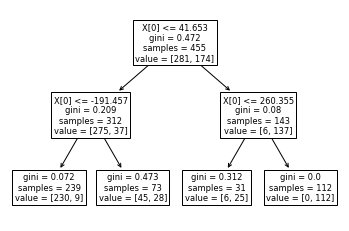

In [16]:
#Defining and fitting a decision tree instance
classifier = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=5)
classifier = classifier.fit(X_train, y_train)

#Setting up expectations and prediction
expected = y_test
predicted = classifier.predict(X_test)

#Show a visual representation of the tree
tree.plot_tree(classifier)

In [17]:
#Look at main classification metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           B       0.94      0.97      0.95        76
           M       0.94      0.87      0.90        38

    accuracy                           0.94       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [18]:
#Create confusion matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(expected, predicted).ravel()
(tn, fp, fn, tp)

(74, 2, 5, 33)

# Summary:

Original data produced the following in (B, M) format:

precision (0.91, 0.98), recall (0.98, 0.88), and F1-Score (0.95, 0.92). 

It's confusion matrix shows the following (tn, fp, fn, tp) format:

(64,1,6,43)

FPR (Fallout) = FP/(FP + TN) = 1/(1+64) = 1/65 = 0.001538

TPR (Recall) = TP/(TP + FN) = 43/(43+6) = 43/49 = 0.87755102

FPR/TPR = 0.0175371

## PCA with component of 1:

precision (0.95, 0.97), recall (0.99, 0.89), and F1-Score (0.97, 0.93)

It's confusion matrix shows:

(77, 1, 4, 32)

FPR (Fallout) = FP/(FP + TN) = 1/(1+77) = 1/78 = 0.01282

TPR (Recall) = TP/(TP + FN) = 32/(32+4) = 32/36 = 0.88889

FPR/TPR = 0.14422

## PCA with component of 2:

precision (0.94, 0.94), recall (0.97, 0.87), and F1-Score (0.95, 0.90)

It's confusion matrix shows:

(74, 2, 5, 33)

FPR (Fallout) = FP/(FP + TN) = 2/(2+74) = 2/76 = 0.02631

TPR (Recall) = TP/(TP + FN) = 33/(33+5) = 33/38 = 0.868421

FPR/TPR = 0.03029

According to summary,  the F1, precision and recall continues to slowly decreases when we utilized pca with one component, and then evens out when we utilize pca with two components.

As for the confusion matrix of each, we can see that the original continuous data shows a higher TP compared to pca with one or two components. FN is also the lowest with the original data. Because of this, I'm unsure on how the continuous data affects this model. 

However, seeing as the split occurs around 142/143 samples for both original continous data and with pca components, I calculated the missclassification error rate to comapre the continous vs discrete. The error rate is higher for the continous data, which means it is not beneficial to the model compared to the discrete.